<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     781 non-null    int64   
 1   pclass       781 non-null    int64   
 2   sex          781 non-null    object  
 3   age          781 non-null    float64 
 4   sibsp        781 non-null    int64   
 5   parch        781 non-null    int64   
 6   fare         781 non-null    float64 
 7   embarked     781 non-null    object  
 8   class        781 non-null    category
 9   who          781 non-null    object  
 10  adult_male   781 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  779 non-null    object  
 13  alive        781 non-null    object  
 14  alone        781 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None
          survived      pclass   sex         age       sibsp       parch  \
cou

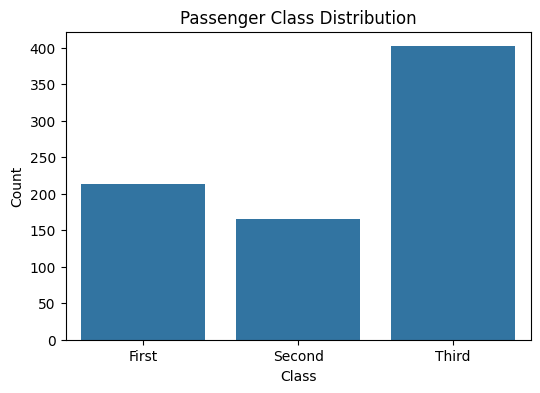

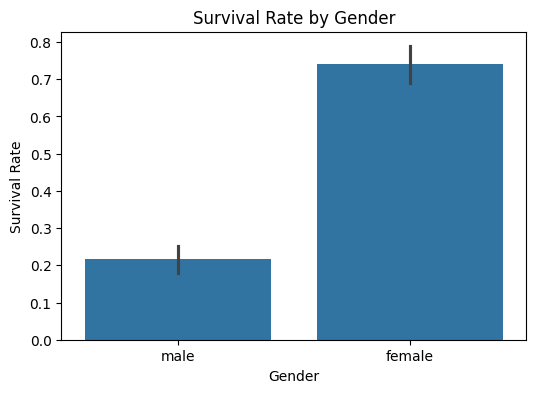

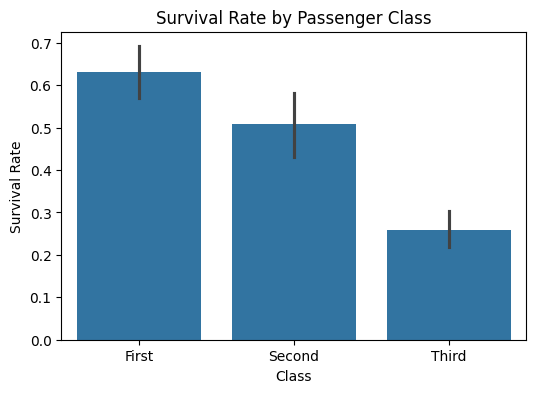

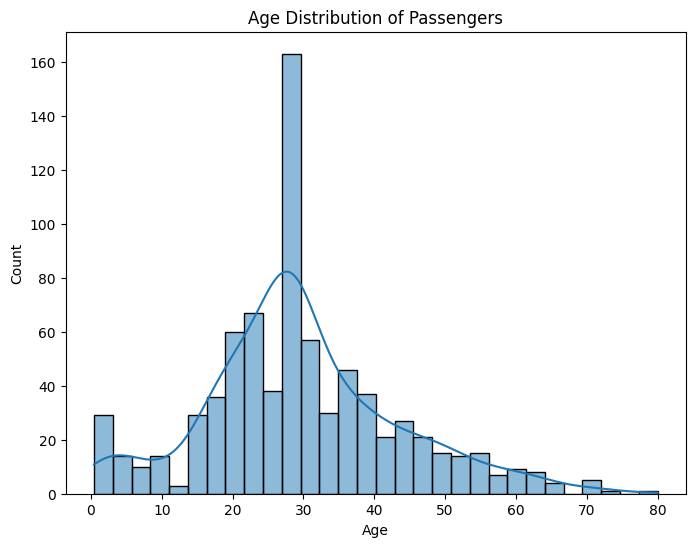

<ipython-input-15-76e45aecbcad>:64: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_pivot = titanic.pivot_table('survived', 'sex', 'class')


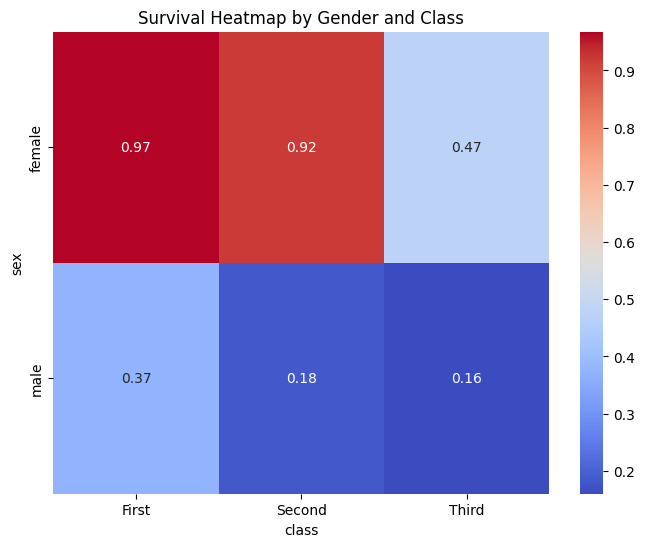

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Step 1: Data Cleaning

# 1. Handling missing values
# Fill missing 'age' with the median value
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Fill missing 'embarked' with the mode (most frequent value)
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Drop the 'cabin' column since it has too many missing values
#titanic.drop(columns=['Name'], inplace=True)

# 2. Handling any potential duplicates
titanic.drop_duplicates(inplace=True)

# Step 2: Data Overview (after cleaning)
print(titanic.info())  # Get an overview of the data after cleaning
print(titanic.describe(include='all'))  # Summary statistics, including categorical columns

# Step 3: Data Visualization (after cleaning)

# 1. Distribution of Passengers by Class
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=titanic)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 2. Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# 3. Survival Rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='class', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

# 4. Age Distribution of Passengers
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 5. Survival by Gender and Class (Heatmap)
plt.figure(figsize=(8, 6))
survival_pivot = titanic.pivot_table('survived', 'sex', 'class')
sns.heatmap(survival_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Survival Heatmap by Gender and Class')
plt.show()